# EDSA Apple Prices Challenge

In the business of buying and selling fresh produce, problems that may be be encountered include being uncertain of how much stock to buy without excessive wastage as well as what prices that stock should be sold at, given it's quality. Furthermore, with fresh produce being available on a seasonal basis, stock and prices tend to fluctuate. 

By using variables associated with the sale of fresh produce and incorporating seasonal fluctuations, the prices of these products can be closely predicted. This can provide an essential service to those budgeting on how much stock to purchase and what to price to sell it at.

In this Apple Prices challenge, we aim to accurately predict the average price per kg of Golden Delicious apples by designing a regression model using several advanced regression techniques. This notebook details the workflow of team JM1 in desiging and implenting a regression model and solution to the "apple price" problem.

### Data Explanation
The data for this competition is provided in two files: df-train_set.csv and df-test_set.csv. The training set has 64376 rows and 13 columns while the testing set has 685 rows and 12 columns. Each row represents one observation and each column is a feature, describing several elements of apple stocks and prices.

#### Columns:

Province - Which province the produce was grown

Container - The code for the type of container

Size_Grade - The class of the produce according to their quality

Weight_Kg - The total weight in kilograms

Commodities - The type of produce, e.g. Golden Delicious Apples

Date - The date of the sale

Low Price -

High Price -

Sales_Total - The total sales price

Total_Qty_Sold - The number of produce sold

Total_Kg_Sold - The total weight of the produce sold in kilograms

Stock_On_Hand - The amount of produce the store has

The training set has one additional column, 'avg_price_per_kg', which represents the average price per kg of apples as well as response variable to be predicted. 

### Necessary Packages

In [3]:
# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import datetime as dt

# Model selection
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold

# Regression models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

# Metrics
from scipy.stats import zscore
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Visualisations
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
from statsmodels.graphics.correlation import plot_corr

# General
import pandas as pd
import numpy as np
import pickle




### Training dataset


In [4]:
# converting test.csv to a Dataframe.
train_csv = pd.read_csv('df-train_set.csv')
train_df = pd.DataFrame(train_csv)

In [5]:
train_df.head(5)

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
0,CAPE,EC120,1L,12.0,APPLE GRANNY SMITH,2020-03-10,108.0,112.0,3236.0,29,348.0,0,9.30
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
2,GAUTENG,AT200,1L,20.0,AVOCADO PINKERTON,2020-05-05,70.0,80.0,4860.0,66,1320.0,50,3.68
3,TRANSVAAL,BJ090,1L,9.0,TOMATOES-LONG LIFE,2020-01-20,60.0,60.0,600.0,10,90.0,0,6.67
4,WESTERN FREESTATE,PP100,1R,10.0,POTATO SIFRA (WASHED),2020-07-14,40.0,45.0,41530.0,927,9270.0,393,4.48


In [6]:
# overview of the train dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64376 entries, 0 to 64375
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Province          64376 non-null  object 
 1   Container         64376 non-null  object 
 2   Size_Grade        64376 non-null  object 
 3   Weight_Kg         64376 non-null  float64
 4   Commodities       64376 non-null  object 
 5   Date              64376 non-null  object 
 6   Low_Price         64376 non-null  float64
 7   High_Price        64376 non-null  float64
 8   Sales_Total       64376 non-null  float64
 9   Total_Qty_Sold    64376 non-null  int64  
 10  Total_Kg_Sold     64376 non-null  float64
 11  Stock_On_Hand     64376 non-null  int64  
 12  avg_price_per_kg  64376 non-null  float64
dtypes: float64(6), int64(2), object(5)
memory usage: 6.4+ MB


The above output provides information on the number of observations in the dataset and indicates if any null values are present. In addition to this the data types of each feature of the dataset is also stated. Within the train dataset 6/13 columns are float type data, 2/13 are integer type data and 5/13 columns are object type data and are likely categorical or ordinal. Any relevant object type features will require pre-processing in order to to fed into the regression model. No null values are present within in dataset.


However, several different commodities in addition to Golden Delicious apples also make up this dataset. Filtering for the product in question is therefore necessary to ensure the data set we move forward with, contains only data pertaining to Golden Delicious apples. The overview output below shows the decrease in observation number from 64376 to 1952.

In [7]:
# filtering train dataframe for rows where Commoditites == 'APPLE GOLDEN DELICIOUS'. See decrease in total number of rows
train = train_df[train_df['Commodities'] == 'APPLE GOLDEN DELICIOUS']
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1952 entries, 1 to 64310
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Province          1952 non-null   object 
 1   Container         1952 non-null   object 
 2   Size_Grade        1952 non-null   object 
 3   Weight_Kg         1952 non-null   float64
 4   Commodities       1952 non-null   object 
 5   Date              1952 non-null   object 
 6   Low_Price         1952 non-null   float64
 7   High_Price        1952 non-null   float64
 8   Sales_Total       1952 non-null   float64
 9   Total_Qty_Sold    1952 non-null   int64  
 10  Total_Kg_Sold     1952 non-null   float64
 11  Stock_On_Hand     1952 non-null   int64  
 12  avg_price_per_kg  1952 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 213.5+ KB


### Testing dataset
This dataset contains the unseen data that our trained model will be exposed to. This will be used to predict the average price per kg of Golden Delicious apples and determine how accurately our model has been trained.

The index column of the test dataset is filtered out as the train_id and dropped from the "main" dataset. This provides the necessary id numbers as a separate variable that will later be used to create a submission cvs, consisting of the id's and their respective 'avg_price_per_kg', predicted by the model.

The test dataset consists of 685 observations and 12 columns, with no null values present.

In [8]:
# converting test csv to Dataframe. Removal of index column from main dataframe and creation of id variable.
test_csv = pd.read_csv('df-test_set.csv')
test_df = pd.DataFrame(test_csv)
test_id = test_df['Index']
test_df = test_df.drop('Index', axis=1)

In [9]:
# overview of train dataset
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 685 entries, 0 to 684
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province        685 non-null    object 
 1   Container       685 non-null    object 
 2   Size_Grade      685 non-null    object 
 3   Weight_Kg       685 non-null    float64
 4   Commodities     685 non-null    object 
 5   Date            685 non-null    object 
 6   Low_Price       685 non-null    float64
 7   High_Price      685 non-null    float64
 8   Sales_Total     685 non-null    float64
 9   Total_Qty_Sold  685 non-null    int64  
 10  Total_Kg_Sold   685 non-null    float64
 11  Stock_On_Hand   685 non-null    int64  
dtypes: float64(5), int64(2), object(5)
memory usage: 64.3+ KB


### EDA of Training Data

Now that the dataframes have been loaded and filtered specifically for 'Golden Delicious' apples, we can carry out some Exploratory Data Analysis (EDA). For the EDA we'll examine any interesting anomalies, trends, correlations, or patterns of the data, both quantitatively and visually, in order to determine how they can be used for feature engineering and modeling training. 

In [10]:
# % of unique values per column of DF.
per_unique_values = train.nunique() / train.count() * 100
per_unique_values

Province             0.358607
Container            0.563525
Size_Grade           0.512295
Weight_Kg            0.461066
Commodities          0.051230
Date                 7.530738
Low_Price            4.815574
High_Price           4.508197
Sales_Total         67.827869
Total_Qty_Sold      25.870902
Total_Kg_Sold       43.545082
Stock_On_Hand       37.653689
avg_price_per_kg    30.788934
dtype: float64

### The distribution of the response

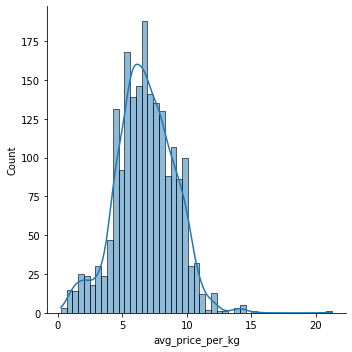

In [11]:
#visualising the 'avg_price_per_kg' distribution
sns.displot(train.avg_price_per_kg, kde=True)
plt.show()

Analysis of the Plot

### The distribution of each predictor

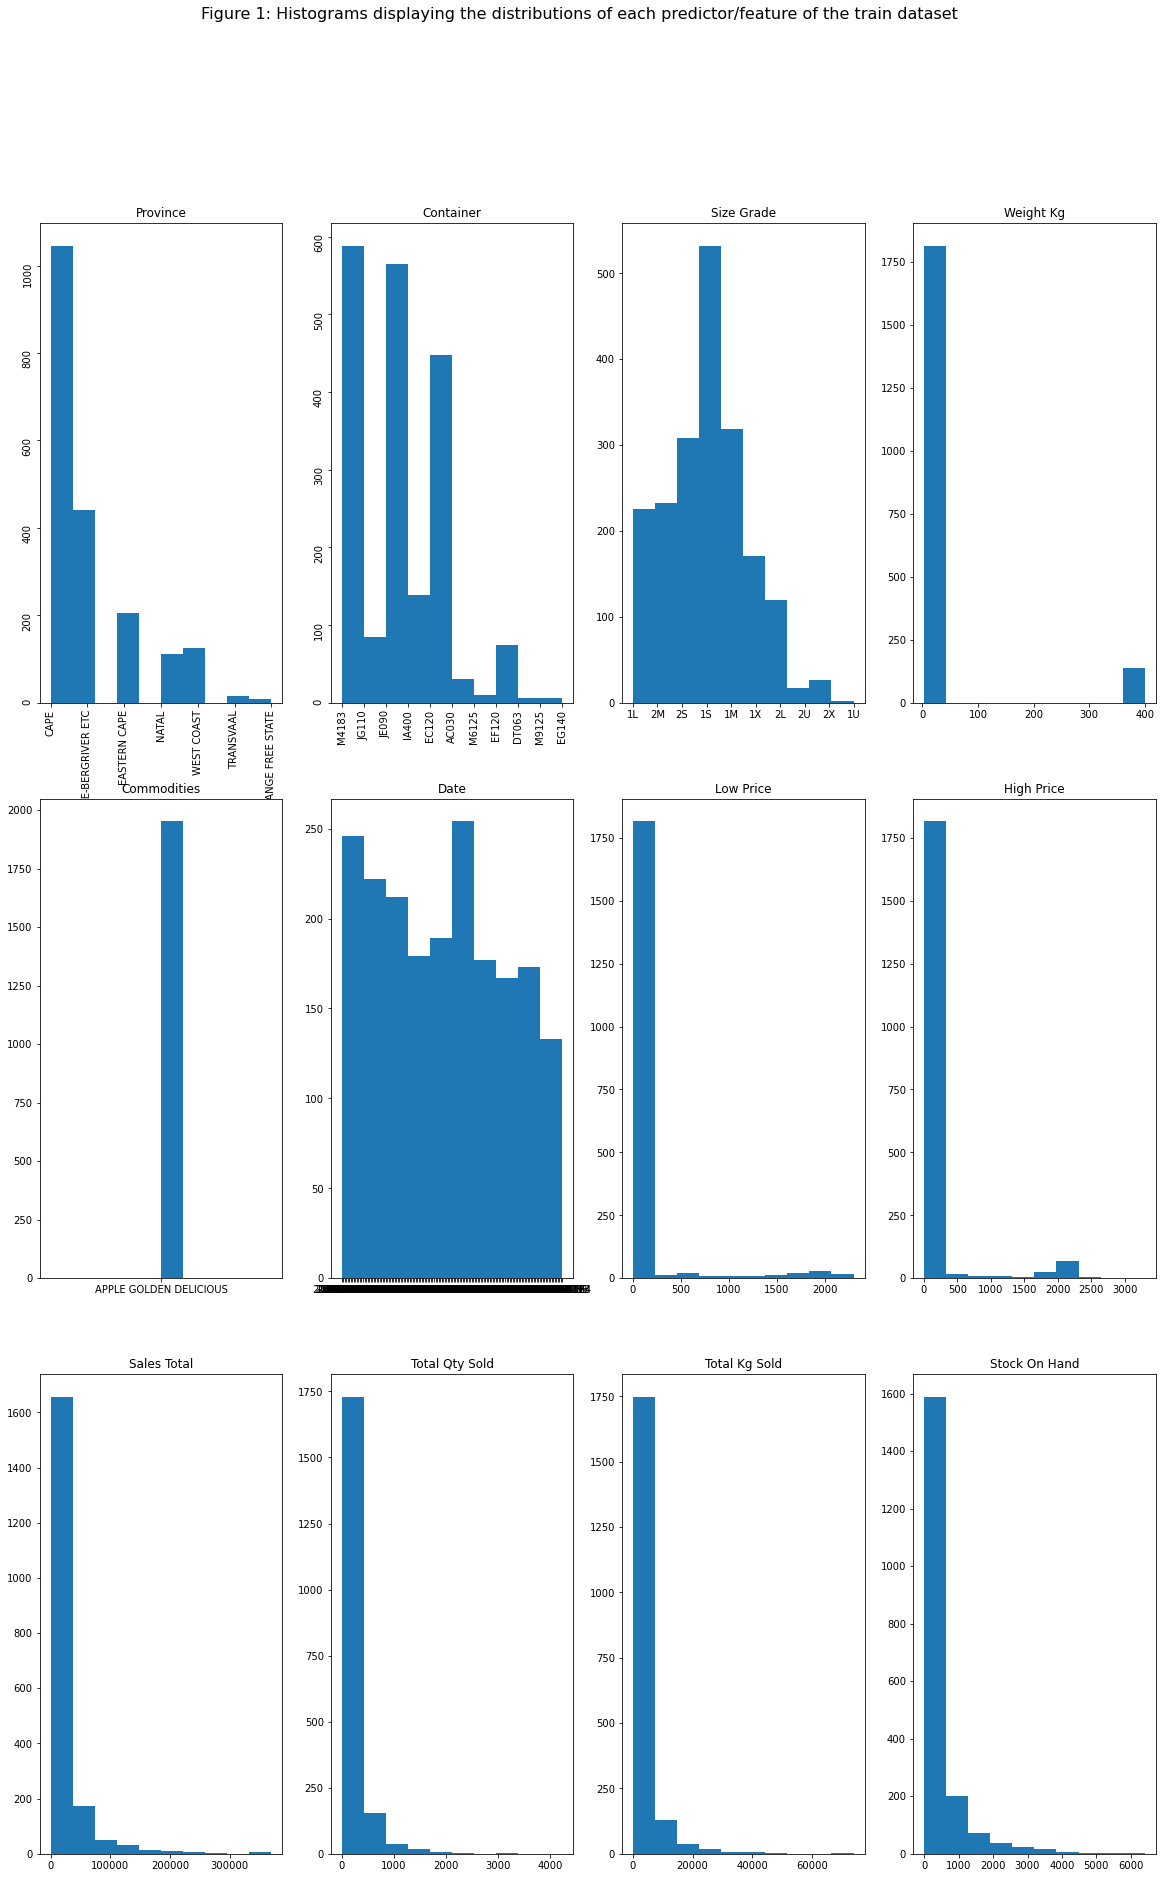

In [12]:
# checking distribution of each predictor
fig, ax = plt.subplots(3,4, figsize=(20,30))
ax[0, 0].hist(train['Province'])
ax[0, 0].set_title('Province')
ax[0, 0].tick_params(labelrotation=90)

ax[0, 1].hist(train['Container'])
ax[0, 1].set_title('Container')
ax[0, 1].tick_params(labelrotation=90)

ax[0, 2].hist(train['Size_Grade'])
ax[0, 2].set_title('Size Grade')

ax[0, 3].hist(train['Weight_Kg'])
ax[0, 3].set_title('Weight Kg')

ax[1, 0].hist(train['Commodities'])
ax[1, 0].set_title('Commodities')

ax[1, 1].hist(train['Date'])
ax[1, 1].set_title('Date')

ax[1, 2].hist(train['Low_Price'])
ax[1, 2].set_title('Low Price')

ax[1, 3].hist(train['High_Price'])
ax[1, 3].set_title('High Price')

ax[2, 0].hist(train['Sales_Total'])
ax[2, 0].set_title('Sales Total')

ax[2, 1].hist(train['Total_Qty_Sold'])
ax[2, 1].set_title('Total Qty Sold')

ax[2, 2].hist(train['Total_Kg_Sold'])
ax[2, 2].set_title('Total Kg Sold')

ax[2, 3].hist(train['Stock_On_Hand'])
ax[2, 3].set_title('Stock On Hand')

fig.suptitle('Figure 1: Histograms displaying the distributions of each predictor/feature of the train dataset', fontsize=16)
plt.show()

- Several predictors appear postively skewed; can normalize/standardize, log transformation, remove outliers
- ***
- ***

### Pairwise plots of all numerical predictors vs 'avg_price_per_kg'
Numerical predictors;
- Weight_Kg
- Low_Price
- High_Price
- Sales_Total
- Total_Qty_Sold
- Total_Kg_Sold
- Total_Stock_On_Hand

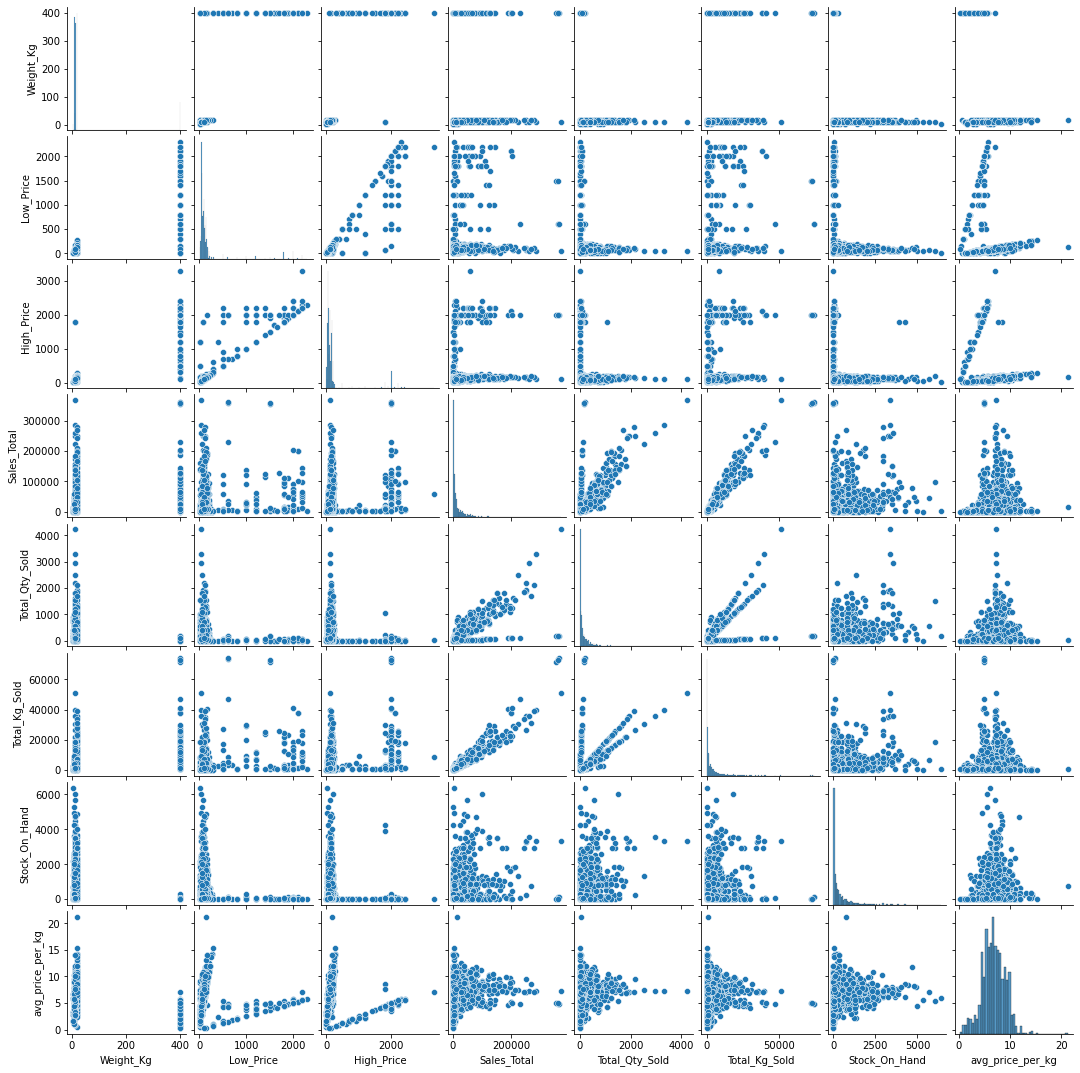

In [13]:
# creates a pairwise plot to identify relationships between numerical predictors and 'avg_price_per_kg'
g = sns.pairplot(train)
g.fig.set_size_inches(15,15)

- No variables have a linear relationship with 'avg_price_per_kg'
- Multicollinearity between 'Low_Price' and 'High_Price'; 'Sales_Total', 'Total_Qty_Sold', 'Total_Kg_Sold'

### Statistical summary of the numerical predictors

This provides further, statistical insight into the distribution of the numerical predictors by summarizing the central tendency, dispersion and shape of the dataset’s distribution. The difference between min and max values amongst the numerical predictors further emphasises that the range

In [14]:
# summary of the numerical predictors
train.describe()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
count,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000
mean,40.460912,174.307377,215.648053,20053.533811,174.510758,2960.176332,408.393955,6.778893
std,99.655169,373.553578,433.546159,39005.069445,308.810797,6097.416527,724.450582,2.248744
min,3.000000,2.000000,5.000000,5.000000,1.000000,3.000000,0.000000,0.250000
25%,9.000000,50.000000,60.000000,1325.000000,12.000000,219.600000,9.000000,5.460000
50%,12.000000,80.000000,108.000000,5495.000000,64.000000,853.500000,126.500000,6.670000
75%,18.300000,127.250000,160.000000,21082.500000,200.000000,3093.525000,468.000000,8.280000
max,400.000000,2300.000000,3300.000000,369464.000000,4237.000000,74000.000000,6400.000000,21.240000


### Relationship between categorical predictors and avg_price_per_kg

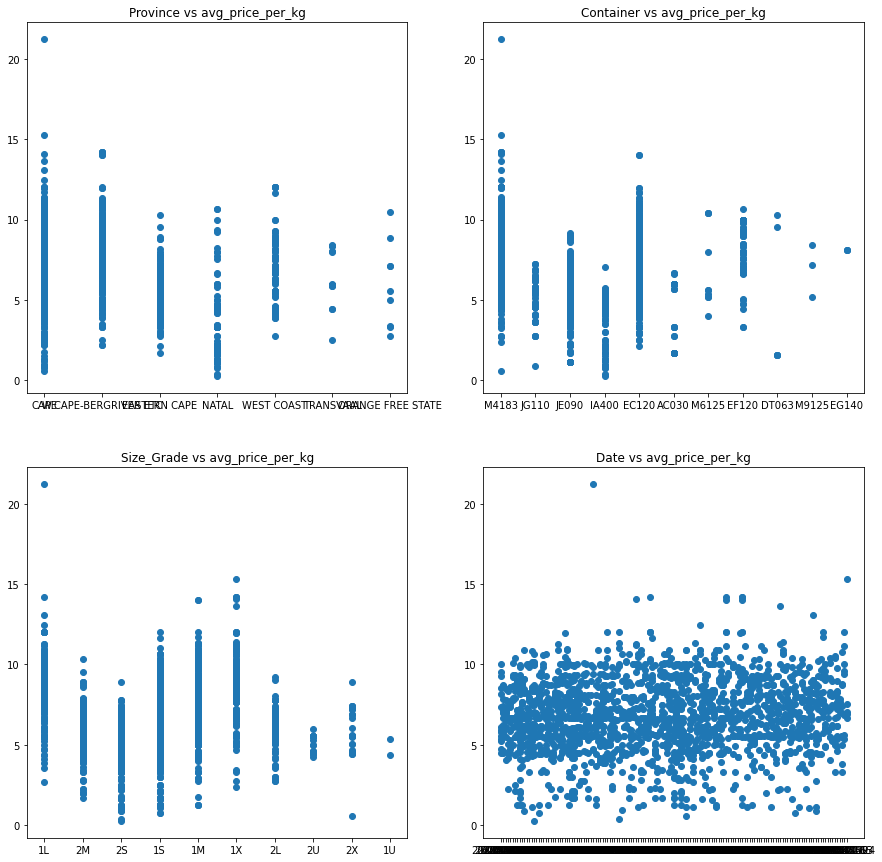

In [15]:
# visuals for relationship between categorical predictors and 'avg_price_per_kg' with scatter plots
fig, ax = plt.subplots(2,2, figsize=(15,15))
ax[0, 0].scatter(train['Province'], train['avg_price_per_kg'])
ax[0, 0].set_title('Province vs avg_price_per_kg')

ax[0, 1].scatter(train['Container'], train['avg_price_per_kg'])
ax[0, 1].set_title('Container vs avg_price_per_kg')

ax[1, 0].scatter(train['Size_Grade'], train['avg_price_per_kg'])
ax[1, 0].set_title('Size_Grade vs avg_price_per_kg')

ax[1, 1].scatter(train['Date'], train['avg_price_per_kg'])
ax[1, 1].set_title('Date vs avg_price_per_kg')
plt.show()

Commodities was excluded from the grid of scatter plot visuals, given all are 'Apple Golden Delicious'. Looking at the relationship between Province and avg_price_per_kg, there are 8 Provinces from which apples are sourced.  The average price is observed to fall between R0 and R15 per kg, irrespective of the province, container and size grade of each observation.
The Date
With Size_Grade being the 'Class of produce according to their quality' this predictor can consider the Size_Grade variable for the model, given that the price of a product typically depends on it's quality. 
The Date also makes a likely addition to the model as fresh produce is available seasonally. 


<AxesSubplot:xlabel='Size_Grade', ylabel='avg_price_per_kg'>

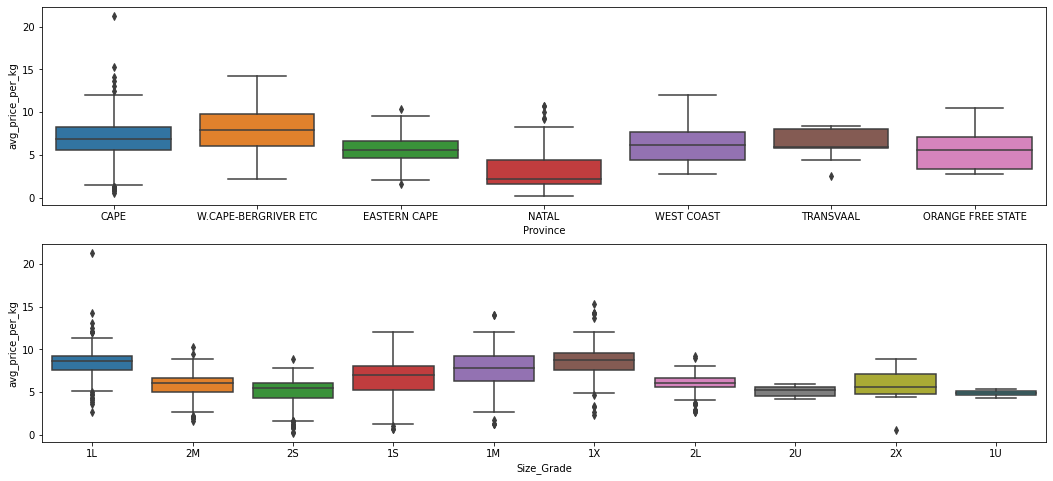

In [16]:
# boxplot visuals displaying the range of apple prices per Province and Size Grade
fig,ax = plt.subplots(figsize=(18,8), nrows=2)
sns.boxplot(data=train, x='Province', y='avg_price_per_kg', ax=ax[0])
sns.boxplot(data=train, x='Size_Grade', y='avg_price_per_kg', ax=ax[1])

In [17]:
# converting 'Date' object to
train['Date'] = pd.to_datetime(train['Date'])
train['Date'] = train['Date'].dt.month
#data_sorted = train.sort_values(by='Date')

<ipython-input-17-7b47b2c66cd8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Date'] = pd.to_datetime(train['Date'])
<ipython-input-17-7b47b2c66cd8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Date'] = train['Date'].dt.month


<AxesSubplot:xlabel='Date', ylabel='avg_price_per_kg'>

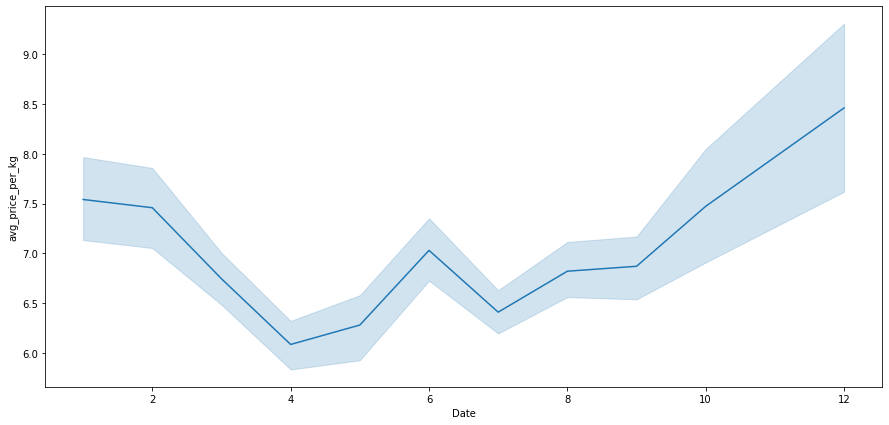

In [18]:
# lineplot visual for change in avg_price_per_kg per Date in months 
fig = plt.subplots(figsize=(15,7))
sns.lineplot(data=train, x='Date', y='avg_price_per_kg')

### Pre-processing of Training and Testing data
In preparation for our model training, the train dataset is required to undergo pre-processing. Similarily, the test dataset requires the same pre-processing in order for the model to accurately predict the response value.